In [83]:
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pathlib import Path

car_prices = Path("/Users/artemzalivchiy/Desktop/car_prices 2.csv")
prices = pd.read_csv(car_prices)
prices.head()



,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [84]:
prices[["make", "model", "body"]].head()

,make,model,body
0,Kia,Sorento,SUV
1,Kia,Sorento,SUV
2,BMW,3 Series,Sedan
3,Volvo,S60,Sedan
4,BMW,6 Series Gran Coupe,Sedan


In [85]:
popular_models = prices.loc[:, ["model"]]
popular_models

,model
0,Sorento
1,Sorento
2,3 Series
3,S60
4,6 Series Gran Coupe
...,...
558832,K900
558833,2500
558834,X5
558835,Altima


In [86]:
transmission_counts= prices['transmission'].value_counts()
print(transmission_counts)

transmission
automatic    475915
manual        17544
sedan            15
Sedan            11
Name: count, dtype: int64


In [87]:
transmission = prices.loc[:, ['transmission']]
transmission.head(10)

,transmission
0,automatic
1,automatic
2,automatic
3,automatic
4,automatic
5,automatic
6,automatic
7,automatic
8,automatic
9,automatic


In [88]:
prices.count()

year            558837
make            548536
model           548438
trim            548186
body            545642
transmission    493485
vin             558833
state           558837
condition       547017
odometer        558743
color           558088
interior        558088
seller          558837
mmr             558799
sellingprice    558825
saledate        558825
dtype: int64

In [89]:
color_distribution_no = prices.dropna(how='any')
color_distribution_no

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [90]:
#Question 5 
color_distribution = prices['color'].value_counts()
color_distribution

color
black        110970
white        106673
silver        83389
gray          82857
blue          51139
red           43569
—             24685
green         11382
gold          11342
beige          9222
burgundy       8972
brown          6717
orange         2078
purple         1561
off-white      1449
yellow         1285
charcoal        479
turquoise       236
pink             42
lime             15
9562              1
2846              1
18561             1
18384             1
5705              1
2817              1
6158              1
721               1
20627             1
20379             1
9837              1
9887              1
2172              1
339               1
6864              1
2711              1
11034             1
16633             1
6388              1
15719             1
12655             1
14872             1
1167              1
9410              1
4802              1
5001              1
Name: count, dtype: int64

In [91]:

valid_colors = prices['color'].apply(lambda x: isinstance(x, str) and x.strip() != '' and not any(c.isdigit() for c in x) and not any(c == '—' for c in x))

# Get value counts of valid colors
color_distribution = prices[valid_colors]['color'].value_counts()

# Display the result
print(color_distribution)

color
black        110970
white        106673
silver        83389
gray          82857
blue          51139
red           43569
green         11382
gold          11342
beige          9222
burgundy       8972
brown          6717
orange         2078
purple         1561
off-white      1449
yellow         1285
charcoal        479
turquoise       236
pink             42
lime             15
Name: count, dtype: int64


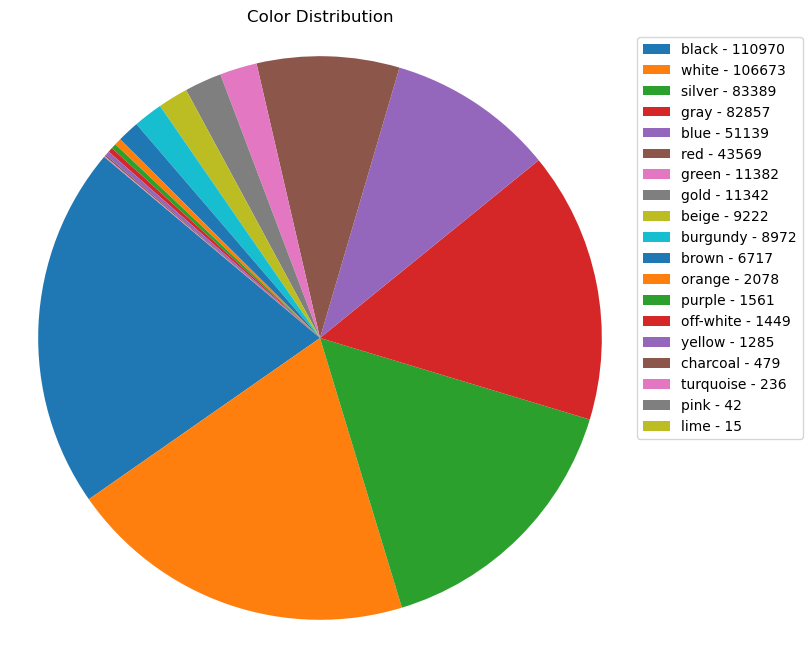

In [92]:
valid_colors = color_distribution[~color_distribution.index.str.contains("—")]

# Create a pie chart
plt.figure(figsize=(8, 8))
patches, _ = plt.pie(valid_colors, startangle=140)
plt.title('Color Distribution')

# Create legend with color counts
labels = ['{} - {}'.format(label, count) for label, count in zip(valid_colors.index, valid_colors.values)]
plt.legend(patches, labels, loc="best", bbox_to_anchor=(1, 1))

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [93]:
#Question 5 but for interior 
color_distribution = prices['interior'].value_counts()
color_distribution

interior
black        244329
gray         178581
beige         59758
tan           44093
—             17077
brown          8640
red            1363
blue           1143
silver         1104
off-white       480
purple          339
gold            324
white           256
green           245
burgundy        191
orange          145
yellow           20
Name: count, dtype: int64

In [94]:
valid_interior = prices['interior'].apply(lambda x: isinstance(x, str) and x.strip() != '' and not any(c == '—' for c in x))

# Get value counts of valid interior colors
interior_distribution = prices[valid_interior]['interior'].value_counts()

# Display the result
print(interior_distribution)

interior
black        244329
gray         178581
beige         59758
tan           44093
brown          8640
red            1363
blue           1143
silver         1104
off-white       480
purple          339
gold            324
white           256
green           245
burgundy        191
orange          145
yellow           20
Name: count, dtype: int64


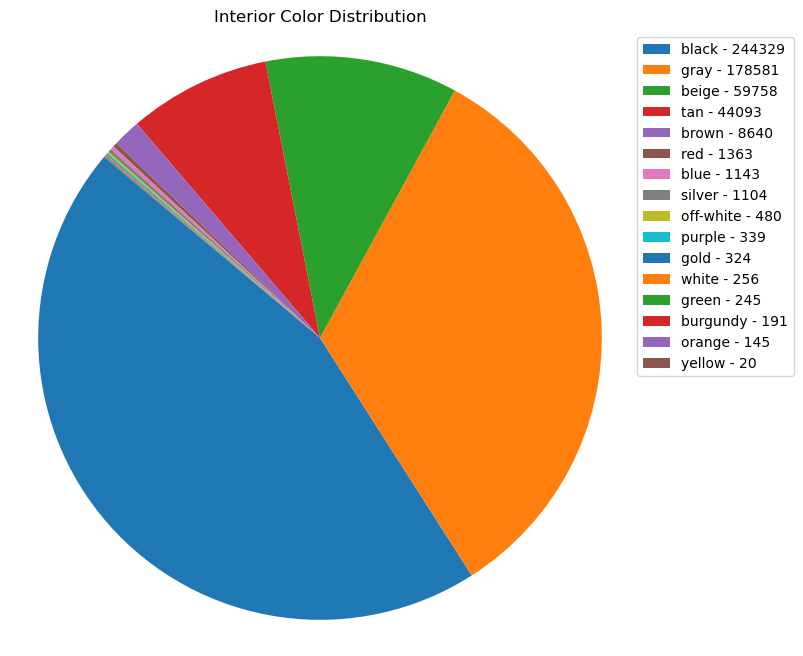

In [95]:
# Filter out valid interior colors
valid_interior = prices['interior'].apply(lambda x: isinstance(x, str) and x.strip() != '' and not any(c == '—' for c in x))
interior_distribution = prices[valid_interior]['interior'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
patches, _ = plt.pie(interior_distribution, startangle=140)
plt.title('Interior Color Distribution')

# Create legend with color counts
labels = ['{} - {}'.format(label, count) for label, count in zip(interior_distribution.index, interior_distribution.values)]
plt.legend(patches, labels, loc="best", bbox_to_anchor=(1, 1))

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [96]:
#Question 8 
prices['Profit'] = prices['sellingprice']- prices['mmr']
profit_by_make = prices.groupby('make')["Profit"].sum()
prices['Profit']

0         1000.0
1          700.0
2        -1900.0
3          250.0
4         1000.0
           ...  
558832   -2300.0
558833     600.0
558834    4200.0
558835   -4000.0
558836   -2900.0
Name: Profit, Length: 558837, dtype: float64

In [97]:
#Question 9
median_price = prices.groupby('make')['sellingprice'].median()
median_price

make
Acura           14900.0
Aston Martin    51000.0
Audi            18500.0
BMW             20100.0
Bentley         62250.0
                 ...   
subaru           3450.0
suzuki           3500.0
toyota           5800.0
volkswagen       3550.0
vw              15500.0
Name: sellingprice, Length: 96, dtype: float64

In [98]:
#Question 11
prices_filtered = prices[prices['state'].str.len() == 2]

# Group by 'state' and 'seller' to get the count of dealerships
dealership_count = prices_filtered.groupby(['state', 'seller']).size().reset_index(name='dealership_count')
# Drop specified columns from the DataFrame
columns_to_drop = ['year', 'model', 'make', 'trim', 'body', 'transmission', 'vin', 'condition', 'odometer', 'color', 'interior', 'mmr', 'sellingprice', 'saledate', 'Profit']
prices = prices.drop(
    labels=columns_to_drop,
    axis=1,
    inplace=False
)

# Display the count of dealerships and the modified DataFrame
display(dealership_count)



,state,seller,dealership_count
0,ab,1360250 alberta ltd,1
1,ab,1360250 alberta ltd.,1
2,ab,1428879 alberta ltd,1
3,ab,1479582 alberta ltd.,6
4,ab,1491081 alberta inc.,4
...,...,...,...
20389,wi,wyss auto sales,1
20390,wi,zimbrick bmw,2
20391,wi,zimbrick eastside,56
20392,wi,zimbrick of middleton,15


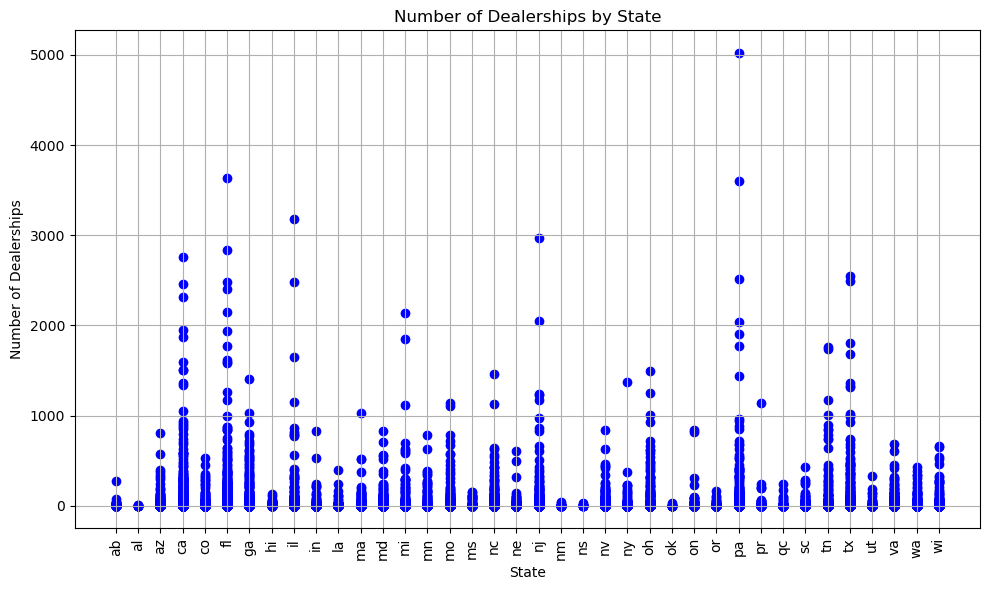

In [99]:
# Assuming dealership_count contains the count of dealerships grouped by state and seller

# Extracting x and y data for scatter plot
x = dealership_count['state']
y = dealership_count['dealership_count']

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue')
plt.title('Number of Dealerships by State')
plt.xlabel('State')
plt.ylabel('Number of Dealerships')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.grid(True)
plt.tight_layout()

# Displaying the plot
plt.show()

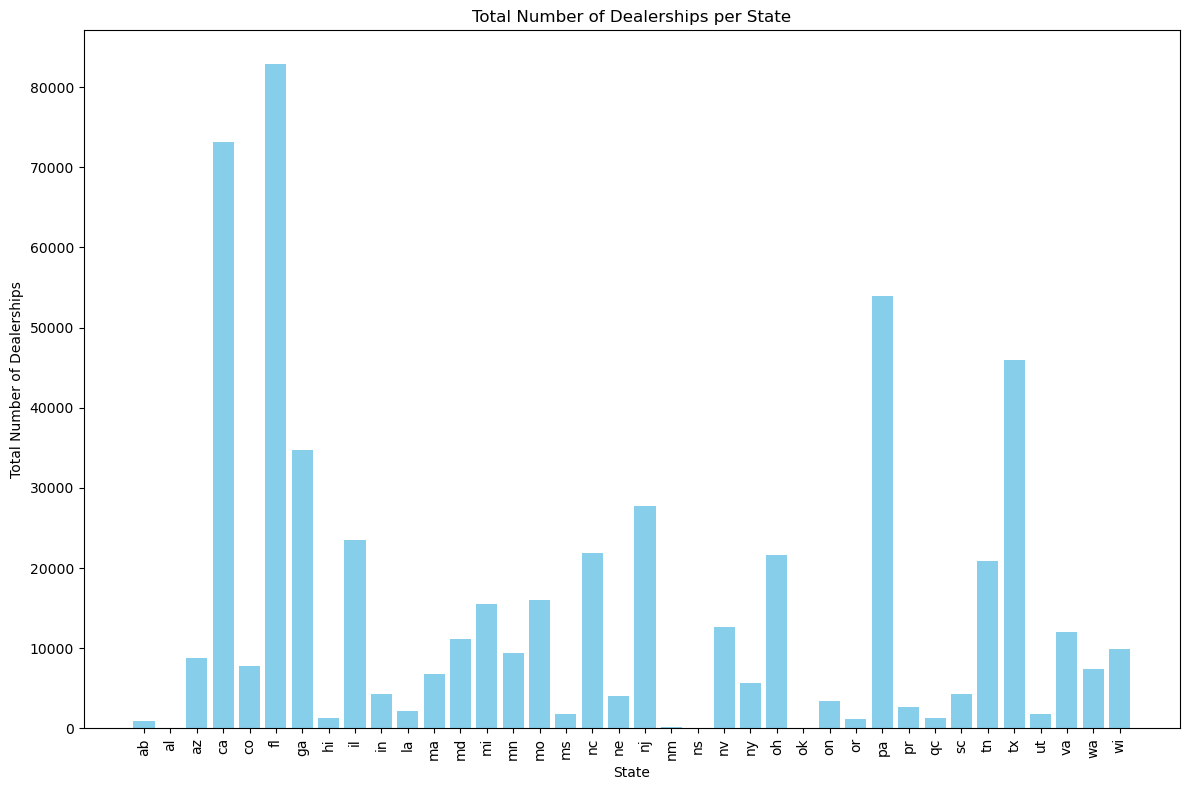

In [100]:
total_dealerships_per_state = dealership_count.groupby('state')['dealership_count'].sum().reset_index()

# Create the bar graph
plt.figure(figsize=(12, 8))
plt.bar(total_dealerships_per_state['state'], total_dealerships_per_state['dealership_count'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Total Number of Dealerships')
plt.title('Total Number of Dealerships per State')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the bar graph
plt.show()

In [101]:
#Question 